In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import pathlib
import os

In [ ]:
tf.random.set_seed(42)
train_data=keras.utils.image_dataset_from_directory('/content/Human Blood/Dataset-master',validation_split=0.2,subset='training',seed=1,image_size=(256,256),batch_size=32)
test_data=keras.utils.image_dataset_from_directory('/content/Test',validation_split=0.2,subset='validation',seed=1,shuffle=True,batch_size=32,image_size=(256,256))

Found 2487 files belonging to 4 classes.
Using 1990 files for training.
Found 4 files belonging to 4 classes.
Using 0 files for validation.


In [ ]:
filenames=pathlib.Path("/content/Human Blood/Dataset-master")
for label in train_data.class_names:
  images=list(filenames.glob(f'{label}/*'))
  print(f'{label}:{len(images)}')

filenames=pathlib.Path("/content/Test")
for label in test_data.class_names:
  images=list(filenames.glob(f'{label}/*'))
  print(f'{label}:{len(images)}')

EOSINOPHIL:623
LYMPHOCYTE:620
MONOCYTE:620
NEUTROPHIL:624
EOSINOPHIL:1
Early:1
MONOCYTE:1
Pre:1


In [ ]:
train_data.cardinality().numpy(), test_data.cardinality().numpy

(63,
 <bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(), dtype=int64, numpy=1>>)

In [ ]:
train_set=train_data.take(1500)
val_set=train_data.skip(1500)

test_set=test_data.take(1500)
val_set=train_data.skip(1500)

In [ ]:
train_data.cardinality().numpy(), val_set.cardinality().numpy()
test_data.cardinality().numpy(), val_set.cardinality().numpy()

(1, 0)

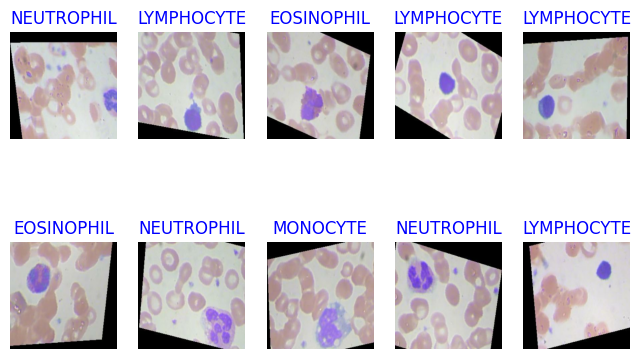

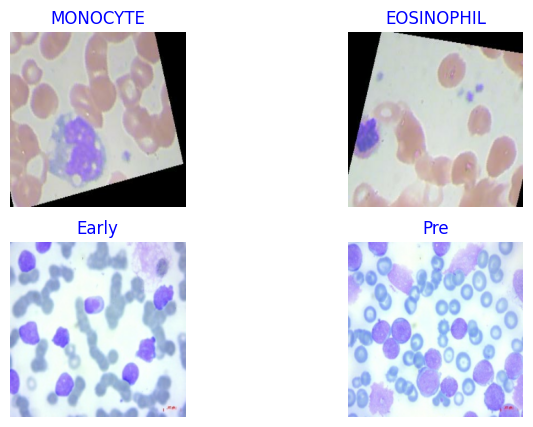

In [ ]:
plt.figure(figsize=(8,5))
for images,labels in train_data.take(1):
  for i in range(10): # Change range to 10 to match the 2x5 grid
    index=random.randint(0,len(images) - 1) # Subtract 1 for valid indices
    ax=plt.subplot(2,5,i+1)
    plt.imshow(images[index].numpy().astype('uint8'))
    plt.title(train_data.class_names[labels[index]], color="blue", fontsize=12)
    plt.axis(False)
plt.show()

plt.figure(figsize=(8,5))
for images,labels in test_data.take(1):
  for i in range(4): # Change the range to 4 to match the 2x2 grid
    index=random.randint(0,len(images) - 1) # Subtract 1 to get valid indices
    ax=plt.subplot(2,2,i+1)
    plt.imshow(images[index].numpy().astype('uint8'))
    plt.title(test_data.class_names[labels[index]], color="blue", fontsize=12)
    plt.axis(False)
plt.show()

In [ ]:
from tensorflow.keras import layers

In [ ]:
tf.random.set_seed(42)
cnn_1=keras.Sequential([layers.Rescaling(1./255),
                        layers.Conv2D(filters=32,kernel_size=3,activation='relu'),
                        layers.MaxPooling2D(pool_size=2),
                        layers.Flatten(),
                        layers.Dense(128,activation='relu'),
                        layers.Dense(4,activation='softmax')]) # Change the final layer to have 4 outputs (assuming 4 classes) and use softmax activation
cnn_1.compile(
    loss=keras.losses.CategoricalCrossentropy(), # Use CategoricalCrossentropy loss for multi-class classification
    optimizer=keras.optimizers.Adam(),
    metrics=['accuracy'])

# Convert labels to one-hot encoding
train_data = train_data.map(lambda images, labels: (images, tf.one_hot(tf.cast(labels, tf.int32), depth=4))) # Cast labels to integers
test_data = test_data.map(lambda images, labels: (images, tf.one_hot(tf.cast(labels, tf.int32), depth=4))) # Cast labels to integers

history_1=cnn_1.fit(train_data,epochs=5,validation_data=test_data)

Epoch 1/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 161s 2s/step - accuracy: 0.2428 - loss: 25.1036 - val_accuracy: 0.2500 - val_loss: 1.3705
Epoch 2/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 153s 2s/step - accuracy: 0.3504 - loss: 1.3291 - val_accuracy: 0.7500 - val_loss: 1.2738
Epoch 3/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 154s 2s/step - accuracy: 0.6496 - loss: 1.0604 - val_accuracy: 0.7500 - val_loss: 1.3289
Epoch 4/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 155s 2s/step - accuracy: 0.7248 - loss: 0.7969 - val_accuracy: 0.5000 - val_loss: 1.4327
Epoch 5/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 202s 2s/step - accuracy: 0.8093 - loss: 0.5669 - val_accuracy: 0.7500 - val_loss: 1.9946


In [ ]:
cnn_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 516128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      66,064,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 198,197,774 (756.06 MB)

 Trainable params: 66,065,924 (252.02 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 132,131,850 (504.04 MB)

In [ ]:
def plottraining_curves(history_df):
  plt.figure(figsize=(13,4),dpi=120)
  ax=plt.subplot(1,2,1)
  plt.plot(range(1,len(history_df)+1),history_df['loss'],marker='.',label='loss')
  plt.plot(range(1,len(history_df)+1),history_df['val_loss'],marker='.',label='val_loss')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def plot_training_curves(history_df):
    plt.figure(figsize = (13, 4), dpi = 120)
    ax = plt.subplot(1, 2, 1)
    plt.plot(range(1, len(history_df) + 1), history_df['loss'], marker = '.', label = 'Training Loss')
    plt.plot(range(1, len(history_df) + 1), history_df['val_loss'], marker = '^', label = 'Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Cross Entropy')
    plt.grid()
    plt.legend()
    ax = plt.subplot(1, 2, 2)
    plt.plot(range(1, len(history_df) + 1), history_df['accuracy'], marker = '.', label = 'Training Accuracy')
    plt.plot(range(1, len(history_df) + 1), history_df['val_accuracy'], marker = '^', label = 'Validation Accurcay')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.grid()
    plt.legend()
    plt.show()

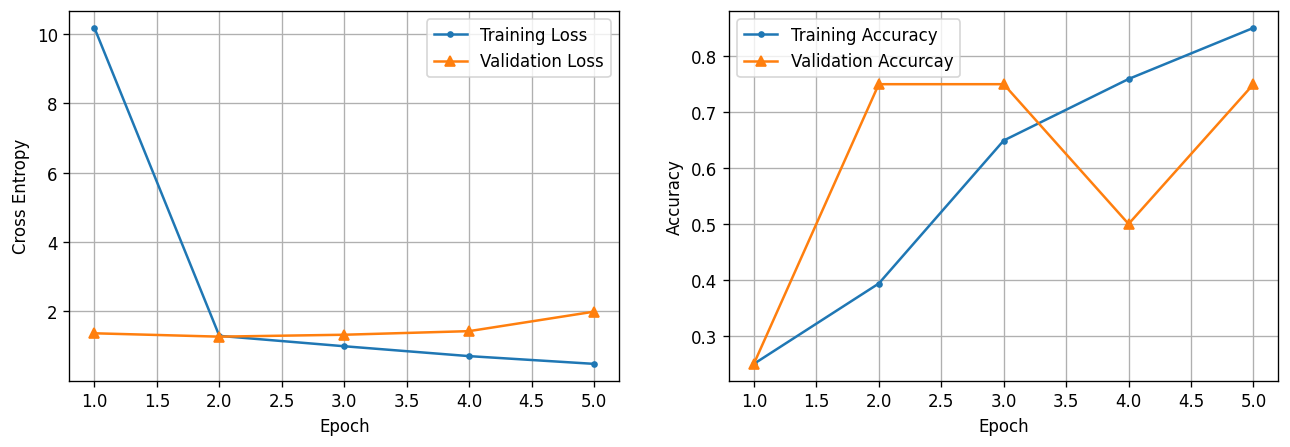

In [ ]:
plot_training_curves(pd.DataFrame(history_1.history))

In [ ]:
X_test, y_test = None, None
for images, labels in test_data.take(100):
    if X_test == None or y_test == None:
        X_test = images
        y_test = labels
    else:
        X_test = tf.concat([X_test, images], axis = 0)
        y_test = tf.concat([y_test, labels], axis = 0)

X_test.shape, y_test.shape

(TensorShape([4, 256, 256, 3]), TensorShape([4, 4]))

In [ ]:
from sklearn import metrics
y_pred_proba = cnn_1.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis = 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


In [ ]:
from sklearn import metrics
y_pred_proba = cnn_1.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis = 1)

# Convert y_test to a binary format (assuming it's currently in multilabel-indicator format)
y_test_binary = np.argmax(y_test, axis=1)  # Assuming y_test is a 2D array

metrics.accuracy_score(y_test_binary, y_pred)  # Use the binary format for both

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


0.75

In [ ]:
train_score = cnn_1.evaluate(train_data, verbose= 1)
test_score = cnn_1.evaluate(test_data, verbose= 1)
print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('*****************************')
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

63/63 ━━━━━━━━━━━━━━━━━━━━ 47s 742ms/step - accuracy: 0.9264 - loss: 0.3587
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.7500 - loss: 1.9946
Train Loss:  0.31671255826950073
Train Accuracy:  0.947236180305481
*****************************
Test Loss:  1.9945566654205322
Test Accuracy:  0.75


In [ ]:
from sklearn.metrics import classification_report
target_names = ['EOSINOPHIL', 'LYMPHOCYTE', 'MONOCYTE', 'NEUTROPHIL']

# Convert y_test to binary format to match y_pred
y_test_binary = np.argmax(y_test, axis=1)

# Now use the binary format for both in classification_report
print(classification_report(y_test_binary, y_pred, target_names=target_names))

              precision    recall  f1-score   support

  EOSINOPHIL       1.00      1.00      1.00         1
  LYMPHOCYTE       0.00      0.00      0.00         1
    MONOCYTE       1.00      1.00      1.00         1
  NEUTROPHIL       0.50      1.00      0.67         1

    accuracy                           0.75         4
   macro avg       0.62      0.75      0.67         4
weighted avg       0.62      0.75      0.67         4



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


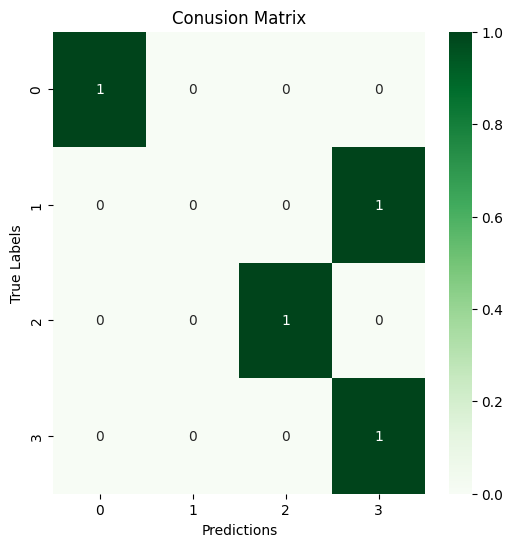

In [ ]:
import seaborn as sns
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

# Convert y_test to binary format to match y_pred
y_test_binary = np.argmax(y_test, axis=1)

plt.figure(figsize = (6,6), dpi = 100)
sns.heatmap(metrics.confusion_matrix(y_test_binary, y_pred), annot = True, cmap = 'Greens') # Use y_test_binary here
plt.xlabel('Predictions')
plt.ylabel('True Labels')
plt.title('Conusion Matrix')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


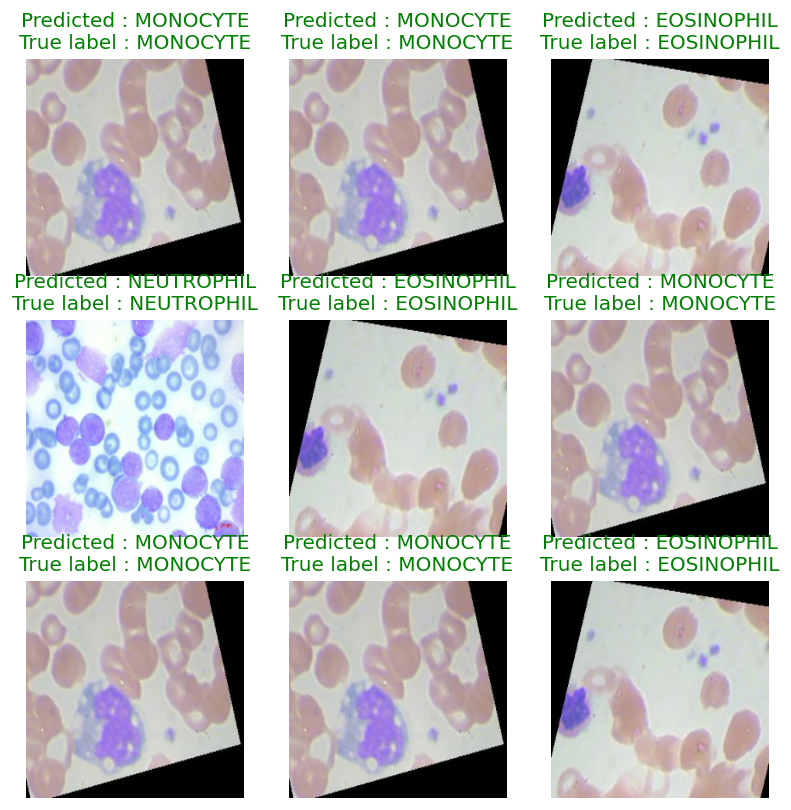

In [ ]:
# plot random images from a given dataset, and compare predictions with ground truth
def plot_random_predictions(dataset, model, class_names): # Add class_names as a parameter
    shuffled_data = dataset.shuffle(10)
    #class_names = dataset.class_names # Remove this line
    for images, labels in shuffled_data.take(1):
        plt.figure(figsize = (8, 8), dpi = 120)
        y_pred_proba = model.predict(images)
    for i in range(9):
        # Ensure the random index is within the valid range
        index = random.randint(0, len(images) - 1)
        ax = plt.subplot(3,3, i + 1)
        img = images[index].numpy().astype("uint8")
        # Convert the label Tensor to a NumPy array and extract the integer index
        y_true = class_names[np.argmax(labels[index].numpy())]
        y_pred = class_names[np.argmax(y_pred_proba[index], axis = 0)]
        c = 'g' if y_pred == y_true else 'r'
        plt.imshow(img)
        plt.title(f'Predicted : {y_pred}\nTrue label : {y_true}', c = c)
        plt.axis(False)

# Assuming 'target_names' from your previous code contains the class names
plot_random_predictions(test_data, cnn_1, target_names) # Pass class names when calling the function